In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
import joblib
import cv2
import numpy as np
import joblib
import time
from PIL import Image, ImageOps, ImageEnhance
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt


Precisión del modelo SVM: 94.00%
Modelo SVM guardado en: svm_model.joblib


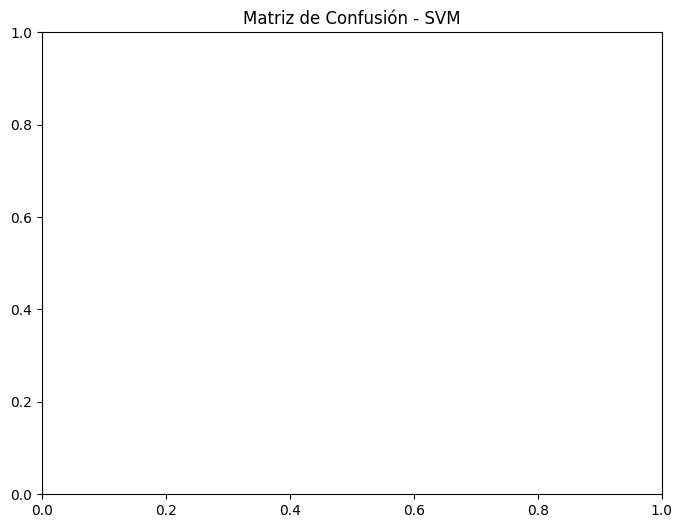

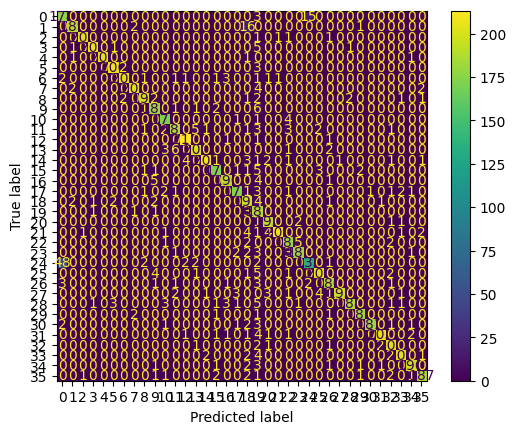

Tiempo de entrenamiento del modelo SVM: 86.99 segundos


In [5]:
# Cargar datos desde el archivo CSV
dataset = np.loadtxt("dataset.csv", delimiter=',')

# Separar etiquetas y píxeles
labels = dataset[:, 0].astype(int)
pixels = dataset[:, 1:] / 255.0  # Normalizar píxeles

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2, random_state=42)

# Inicializar el clasificador SVM
class SVMClassifier:
    def __init__(self, kernel='rbf', decision_function_shape='ovr'):
        self.svm = SVC(kernel=kernel, decision_function_shape=decision_function_shape)

    def fit(self, X, y):
        self.svm.fit(X, y)

    def predict(self, X):
        return self.svm.predict(X)

# Inicializar el clasificador SVM
svm_classifier = SVMClassifier()

# Medir el tiempo de entrenamiento
start_time = time.time()
# Entrenar el modelo
svm_classifier.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Guardar el modelo entrenado en un archivo
model_filename = "svm_model.joblib"
joblib.dump(svm_classifier, model_filename)

# Realizar predicciones en el conjunto de prueba
predictions = svm_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión del modelo SVM: {accuracy * 100:.2f}%')

# Imprimir el nombre del archivo donde se guardó el modelo
print(f'Modelo SVM guardado en: {model_filename}')

# Plotear la matriz de confusión
conf_matrix_svm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.title('Matriz de Confusión - SVM')

disp_svm = ConfusionMatrixDisplay(conf_matrix_svm)
disp_svm.plot()
plt.show()

# Imprimir el tiempo de entrenamiento
print(f'Tiempo de entrenamiento del modelo SVM: {training_time:.2f} segundos')


In [8]:
# Definición de la clase SVMClassifier
class SVMClassifier:
    def _init_(self):
        self.svm = SVC()

    def fit(self, X, y):
        self.svm.fit(X, y)

    def predict(self, X):
        return self.svm.predict(X)

# Preprocesamiento de una única imagen de letra
def preprocess_image(input_path, output_path, vertical_padding):
    input_image = Image.open(input_path).convert('L')

    # Aumentar contraste
    enhancer = ImageEnhance.Contrast(input_image)
    contrasted_image = enhancer.enhance(2.0)

    final_image = contrasted_image

    # Redimensionar manteniendo la relación de aspecto
    aspect_ratio = final_image.width / final_image.height
    new_width = int(32 * aspect_ratio)
    resized_image = final_image.resize((new_width, 32), Image.LANCZOS)

    # Aplicar padding
    horizontal_padding = (32 - resized_image.width) // 2
    padded_image = ImageOps.expand(resized_image, border=(horizontal_padding, vertical_padding), fill='white')

    # Redimensionar al tamaño final
    final_image = padded_image.resize((32, 32), Image.LANCZOS)

    # Guardar la imagen resultante
    final_image.save(output_path)

# Predicción de la letra con el modelo SVM
def predict_letter(image_path, model):
    input_image = Image.open(image_path).convert('L')
    resized_image = input_image.resize((28, 28), Image.LANCZOS)
    normalized_pixels = np.array(resized_image) / 255.0
    flattened_pixels = normalized_pixels.flatten()
    predicted_label = model.predict([flattened_pixels])[0]
    return predicted_label

# Cargar el modelo entrenado (SVM)
model_filename = "./svm_model.joblib"
svm_model = joblib.load(model_filename)

# Ruta de la imagen de la letra
letter_image_path = "./images/m.jpg"

# Ruta para la imagen preprocesada
preprocessed_image_path = "./letra_preprocesada.png"

# Preprocesar la imagen de la letra
preprocess_image(letter_image_path, preprocessed_image_path, 4)

# Predecir la letra
predicted_label = predict_letter(preprocessed_image_path, svm_model.svm)  # Asegúrate de acceder al atributo svm de la instancia

# Mapeo de números a letras
number_to_letter = {10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G',
                    17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N',
                    24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U',
                    31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'}

# Convertir el número de etiqueta a letra o número según corresponda
predicted_output = number_to_letter.get(predicted_label, str(predicted_label))

# Imprimir la letra o número predicho
print("Carácter predicho:", predicted_output)

Carácter predicho: M
